In [2]:
pip install anomalib torch torchvision


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 26.8 MB/s eta 0:00:00
  Created wheel for freia: filename=FrEIA-0.2-py3-none-any.whl size=42763 sha256=ea2a16e7d754b391f146227808925182e7914b16e9aaebbadd3f4f3f3512759d
  Stored in di

In [3]:
from anomalib.data import MVTecAD
from anomalib.models import Patchcore
from anomalib.engine import Engine


datamodule = MVTecAD(
    root="/content/drive/MyDrive/patch",
    category="carpet",
    #image_size=256,
)
datamodule.setup()

# Check train/test
print("Train samples:", len(datamodule.train_dataloader().dataset))
print("Test samples:", len(datamodule.test_dataloader().dataset))


model = Patchcore(
    backbone="resnet18",
    layers=["layer2", "layer3"],
    coreset_sampling_ratio=0.01,
)
engine = Engine(
    accelerator="cpu",
    devices=1,
    max_epochs=1,
    enable_progress_bar=False,
    logger=False,
)



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train samples: 280
Test samples: 117


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [4]:
engine.fit(model=model, datamodule=datamodule)


INFO:lightning_fabric.utilities.rank_zero:GPU available: False, used: False
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │  2.8 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 2.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.8 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 69                                                                                           
Total FLOPs: 0

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:534: Found 69 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.
Selecting Coreset Indices.: 100%|██████████| 2867/2867 [14:46<00:00,  3.23it/s]
INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [7]:
# If this works, memory exists
results = engine.test(model=model, datamodule=datamodule)
print("PatchCore inference successful")


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9767255783081055     │
│       image_F1Score       │    0.9599999785423279     │
│        pixel_AUROC        │    0.9873102903366089     │
│       pixel_F1Score       │    0.5542346239089966     │
└───────────────────────────┴───────────────────────────┘

PatchCore inference successful


In [9]:
predictions = engine.predict(model=model, datamodule=datamodule)
preds = predictions[0] # Assuming you want predictions from the first batch

print(preds.pred_score.shape)     # anomaly score per image
print(preds.anomaly_map.shape)    # pixel-level anomaly heatmap

INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([32])
torch.Size([32, 256, 256])


In [11]:
print(results)


[{'image_AUROC': 0.9767255783081055, 'image_F1Score': 0.9599999785423279, 'pixel_AUROC': 0.9873102903366089, 'pixel_F1Score': 0.5542346239089966}]


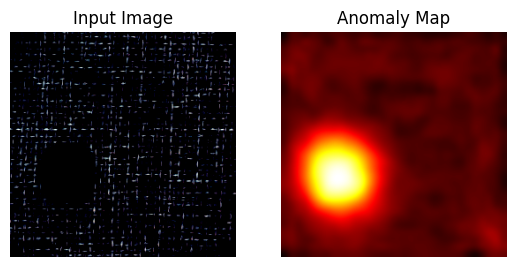

In [13]:
import matplotlib.pyplot as plt

img = preds.image[0].permute(1,2,0).cpu().numpy()
heatmap = preds.anomaly_map[0].cpu().numpy()

plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Anomaly Map")
plt.imshow(heatmap, cmap="hot")
plt.axis("off")

plt.show()
